In [1]:
import sklearn
import sklearn.preprocessing     # For StandardScaler
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

### Dataset Cleaning and reformat

In [2]:
data = pd.read_csv('data/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data["timestamp"] = pd.to_datetime(data[["year", "month", "day", "hour"]])

In [4]:
data = data.set_index("timestamp")

In [5]:
data.drop(["No", "year", "month", "day", "hour"], axis=1, inplace=True)

In [6]:
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [7]:
# Drop NAN value
data = data.dropna()

In [8]:
# Factorize String data
data['cbwd'] = pd.factorize(data['cbwd'])[0]

<ipython-input-8-59ff021e648f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cbwd'] = pd.factorize(data['cbwd'])[0]


In [9]:
data.to_csv('data/cleaned_data')

In [10]:
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,0,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,2,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,2,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,2,242.70,0,0


In [11]:
data.columns

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

### Dataset Visualization

Text(0.5, 1.0, 'PM2.5 with timestamp')

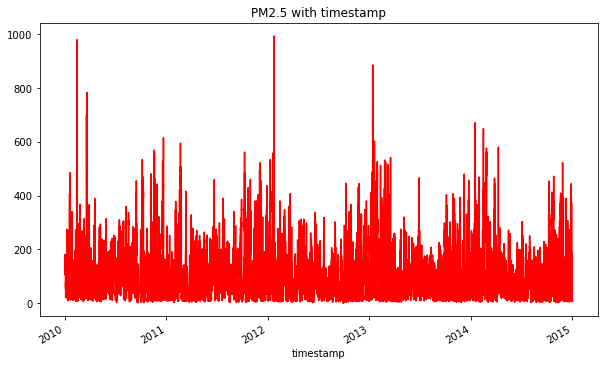

In [12]:
data['pm2.5'].plot(kind='line',color='red')
plt.title("PM2.5 with timestamp")

Text(0.5, 1.0, 'Cumulated Hours Of Rnow Distribution')

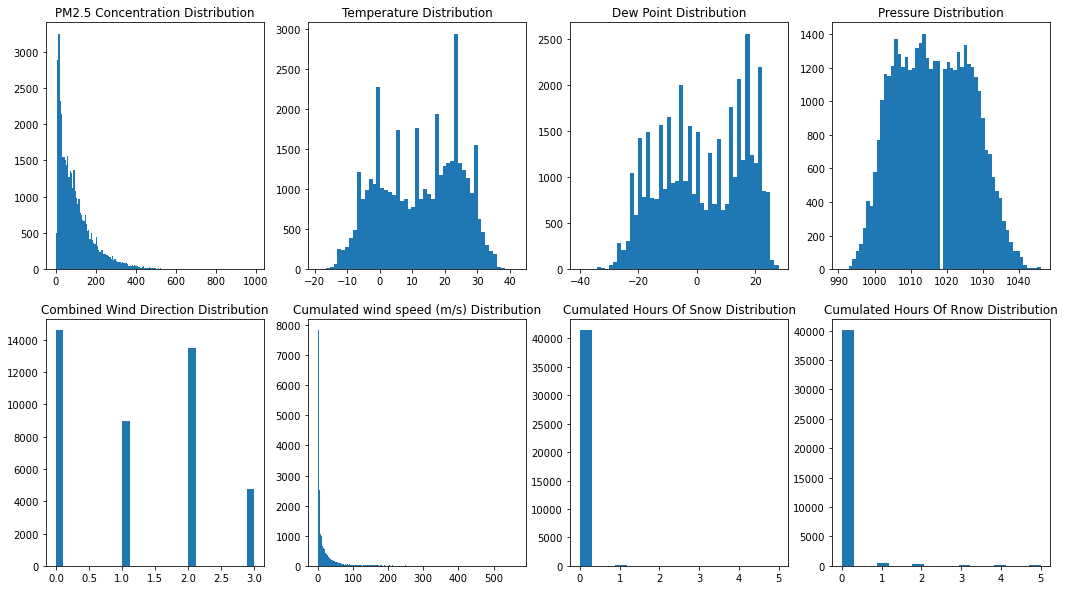

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(2, 4, 1)
plt.hist(data['pm2.5'], bins='auto')
plt.title('PM2.5 Concentration Distribution')
plt.subplot(2, 4, 2)
plt.hist(data['TEMP'], bins='auto')
plt.title('Temperature Distribution')
plt.subplot(2, 4, 3)
plt.hist(data['DEWP'], bins='auto')
plt.title('Dew Point Distribution')
plt.subplot(2, 4, 4)
plt.hist(data['PRES'], bins='auto')
plt.title('Pressure Distribution')
plt.subplot(2, 4, 5)
plt.hist(data['cbwd'], bins='auto')
plt.title('Combined Wind Direction Distribution')
plt.subplot(2, 4, 6)
plt.hist(data['Iws'], bins='auto')
plt.title('Cumulated wind speed (m/s) Distribution')
plt.subplot(2, 4, 7)
plt.hist(data['Is'], bins='auto', range=[0,5])
plt.title('Cumulated Hours Of Snow Distribution')
plt.subplot(2, 4, 8)
plt.hist(data['Ir'], bins='auto', range=[0,5])
plt.title('Cumulated Hours Of Rnow Distribution')